# Association Rule Learning Intuition

**'People who bought also bought'**. We would have come accross this statement or information when we buy in e-commerce websites like Flipkart or amazon. Yes. we are going to see today a topic about **recommender systems**. It's called as **association rule learning**.

We will see this via. a story.

A **convenience store** did some analytics around the products that people were purchasing. They analyzed thousands and thousands and thousands of products. **Surprisingly, a peculiar commanilities between two different products** are found.
They are **diapers & beers**. Very peculiar ain't it?..

**Deep into the story** - The husbands who are out of work and on their return to home, the wives calls them to buy diapers when they come home. And husbands after buying the diapers, they tend to buy beers before they move on to billing. This is the reason for these two products to get sold more.

So, In short, this algorithm helps to give the rule to buy two things with high statistical value. The products if bought together, will give good sales to business person.

In other words, it helps to identify the two best products that can be bought together using the rule of statistical approch and not just with speculation. business people will use criteria to increase sales of a product or do market by giving the ads to motivate the customer to buy this product.

**People who bought something also bought something, people who watched also watched something, people who did something also did something** anything could be.

And this ideally shouldn't stop **recommending with one other product alone. It can also use more than one. It can be three or four or five and so on**.

There are many types of algorithms available on association rule learning. Of which we will see two main types. They are,

1. Apriori

2. Eclat

# Apriori Intuition

There are some potential rules to recommend a product.
Apriori comes in three parts. They are,

1. Support

2. Confidence

3. Lift

Let's see everything in detail. The below diagram depicts the users who watched certain movies. There are people who watched movies1,2,3,4. There are people who watched both movies 1 and 4. There are people who watched both movies 1 and 3.
People who both 2 and 4. People who watched 1 and 2 and so on and on and on... there are several combinations like this.
So, to apply the rule to recommend viewers to buy the other movie, the above algorithm is applied.

**Support** - It's very similar to naive bayes algorithm. It is used for **movie recommendation**. **Support for movie M** is defined as,

**Support(M) = No. of user watchlist containing M / Total no. of users.**

The above statement is as simple as the no. of users who watched a particular movie divided by the total no. of users.

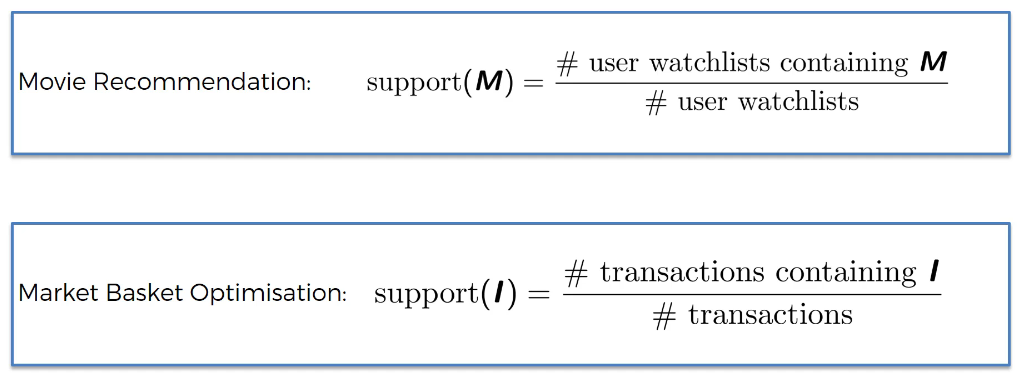

**Confidence(M) = No. of users watchlist containing M1 and M2 / No. of users watchlist containing M1**.

The above statement is nothing but, if suppose a movie M1 is watched by 50 users. And the same 50 users also watched movie M2 is 20. Then **confidence** is 20/50 = 2.5

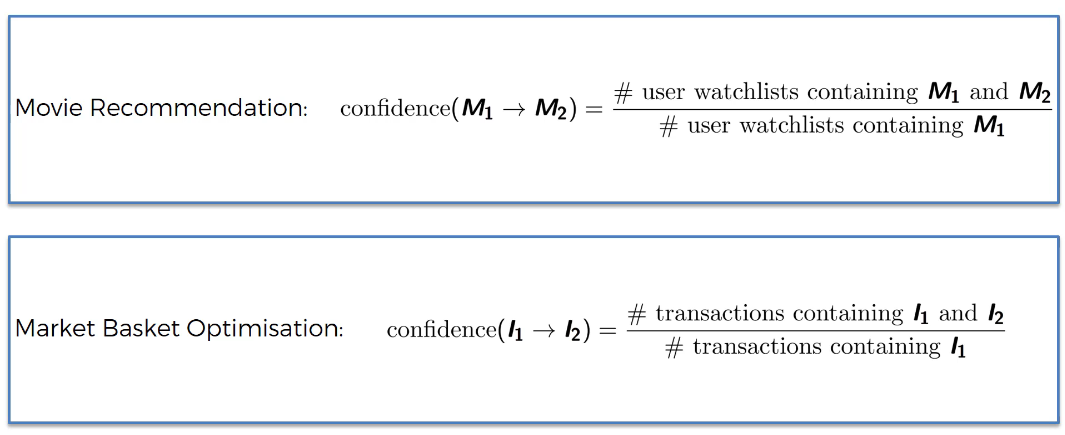

**Lift(M1->M2) = Confidence(M1->M2) / Support(M2)**

The above statement clearly defines. It's just the confidence/support.

Let's see the step by step approach that above algorithm involves.

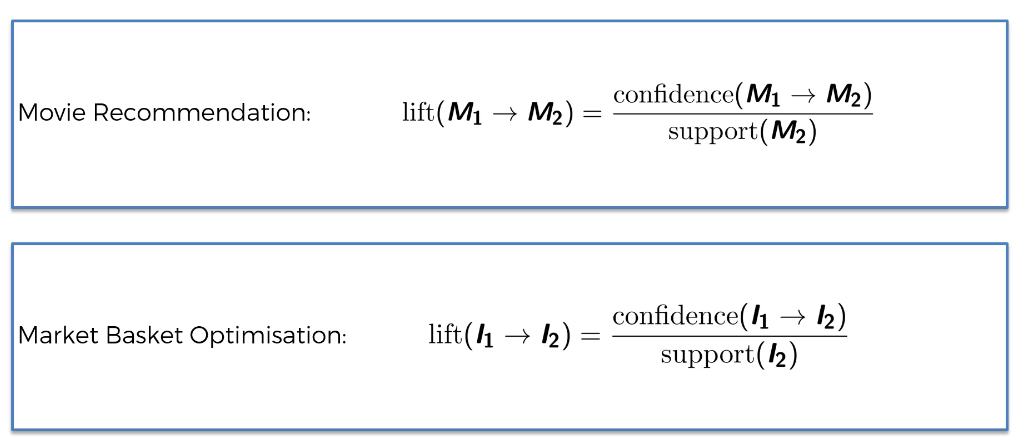

**Step1** - Set a minimum support and confidence. This means - Since there are so many different recommendations and we have just seen 2 movies in our example. Apriori is a slow alogrithm, that goes through 100 different combinations. In our case it's 100 different movies. **We might not look at products that have a support less than 20%** we don't need to consider them because we don't want to waste time building a model for something that has a success rate of 20% on it's own.

**Step2** - Take all subsets in transactions having higher support than minimum support.

**Step3** - Take all rules of these subsets having higher confidence than minimum confidence.

**Step4** - Sort the rules by decreasing it. - That's where the lift finally comes in. The rule with highest lift given these criteria is going to be strongest rule. This is the one we might want to look into first.

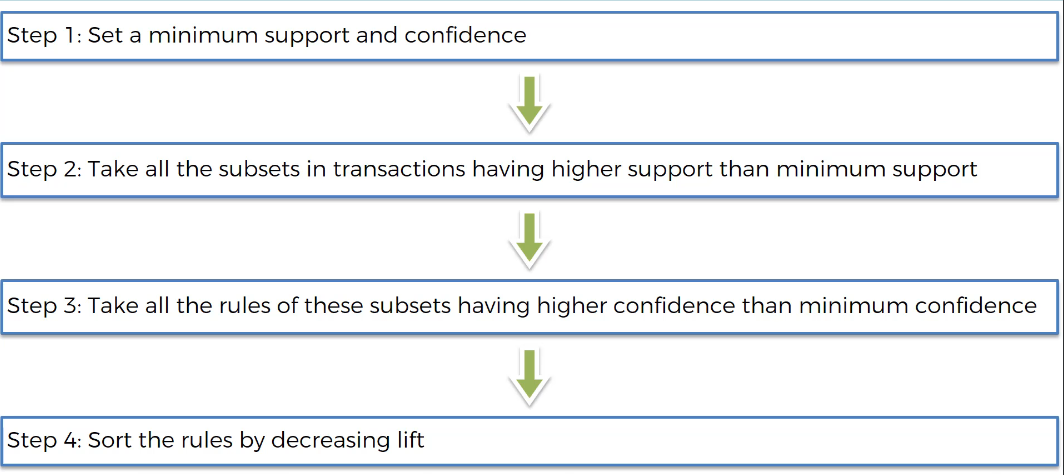

# Importing libraries

In [35]:
"""For the first time ever we are not going to use scikitlearn (sklearn) library. Unfortunately since, there is no class or
functions available in sklearn library we will be using another library called apyori. This apyori library has several
methods that are required for recommender systems.

But, since we don't have this apyori installed, we need to first install it before we make use of it.

Below is the code snippet to install the apyori library in kaggle notebook."""

!pip install apyori

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [37]:
"""Before fetching or importing dataset, keenly observe the data from excel. It doesn't contain column headers.
So, we need to specifically mention the pandas dataframe with an attribute called header and value as 'None'. This will
help to consider the first line of data into account. If not explicitly mentioned, it will ignore the
first line of data."""

df = pd.read_csv('/kaggle/input/market-basket-analysis/Market_Basket_Optimisation.csv',header=None)

"""Now, we will use a function called apriori after importing from apyori module. And this apriori module expects the
data to be in a list format and not in pandas dataframe format.

So, we need to finetune the format of data that is available in the form of pandas dataframe. We will change the format
to list. List of transactions.

We will initialize an empty list as data and then append it later after looping each and every data (rows & columns)
in for loop.

Notice that we use 2 loops, one for fetching row values and the other loop for fetching column values. Also, we need
to specify the range as 7501 since the dataset contains 7500 rows and the python upper bound ignores the last value.
hence 7501.

Now comes the next for loop for fetching column values(j).

If you see carefully, we would used list comprehension which is the single row for loop execution.hence the [].

Next is the format of df.values[i,j]. It's simply the dataframe values that we try to fetch rows and columns so what within
square bracket.

The next important thing is, apriori will accept data only in string format. Hence the str() used in df.values[i,j]"""

data = []
for i in range(0,7501):
    data.append([str(df.values[i,j]) for j in range(0,20)])

# Training the Apriori model on dataset

In [38]:
"""apriori function will return the rules. It will both train the apriori model and also return the rules with
different supports, confidences and lifts.

apriori function will take parameters such as datasets on which we are going to apply the apriori model. the name of
the parameter is transactions and the value for that is the data list which we created.

The next parameter is min_support. This is the support. We set the value for this is with minimum support value
as there is a support for each rule and not to compute all the rules but atleast the rules with some certain relevance.
The value is decided purely based on requirement. Here we need one product on left hand side of rule and the other
product/element on the right hand side of rule. We want this products to be appeared for a minimum amount of time
which is what exactly the support is. So, we consider 3 times to be appeared for these products daily. Since
the 7501 products are recorded per week, we multiply this 3 times by 7 and the
total divided by 7501. ((3*7)/21 = 0.0027 rounded off to 0.003).
This simply means, the product in the rules should appear 0.3% times of the time.

The next paramter is min_confidence. The value for this min_confidence is done using the thumb rule which is 0.8.
But this value is way too high because 0.8 means, it should be 80% correct and since we have very few rules,
we choose here as 0.2 Choosing this value again depends based on business requirement. This again means for
each product A in left hand side of rules, we will have product B in right hand side atleast 20%

The next parameter is min_lift. The value of min_lift should atleast be 3. Anything below that will not make the
rule to be relevant. This is again rule of thumb and based on the experience.

The next parameter is min_length which is actually the minimum no.of elements we want in our rule left or right.
Since we need only 2 products at the end. One on the left hand side of rule and the other is right hand side of
rule, the value is 2.

The next parameter is max_length which is actually the maximum no.of elements we want in our rule left or right.
Since we need only 2 products at the end. One on the left hand side of rule and the other is right hand side of rule,
the value is 2.

For example, if the rule or to find the deals for buy 2 and get 1 free, then the min_length=3 and max_length=3"""

from apyori import apriori
rules = apriori(transactions = data, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

# Displaying the first results coming out directly from the output of apriori function

Here we will see which are going to be best deals - buy one product and get another for free.

In [42]:
"""Below are the list of rules that we get following the above criteria.

For instance, items_base is the product on left hand side and the items_add is the product on right hand side.
If customer buys light cream, then there is a 29% confidence that the same customer buy chicken."""

results = list(rules)
#lhs = [result[2][0][0][0] for result in results]

list

# Putting the results well organized into a Pandas DataFrame

Since the output of the rule is very clumsy and has so many drags from left to right, there is a code snippet that helps greatly to see the data with hassle-free. This is a well organized into a pandas data frame.

In [40]:
lhs = [for result in]
type()

SyntaxError: invalid syntax (602143914.py, line 1)

In [ ]:
"""Always remember, lift is the most relevant metric to measure the strength of a rule.

In the first line of above result, the lhs is light cream and the rhs is chicken. It means, if customer buys
light cream then there is 29% confidence of buying chicken along with it. Which means there is a high chance of
buying chicken if customer buys light cream.

Below is the code snippet that helps to view the rules of dataset in proper fashion.
The inspect function requires an input which is results. It takes results as arguments that will exhibit the output.

lhs - It's the list comprehension. That is a for loop in list format that is enclosed by square bracket[]. But the final
output of lhs is wanted in tuple."""

def inspect(results):
    lhs = [tuple(result[[2][0][0]]) for result in results]